# Question 1

## Part (a)

In [1]:
IM = read.csv("InfantMortality.csv")
fix(IM)
attach(IM)

*Linear Model*

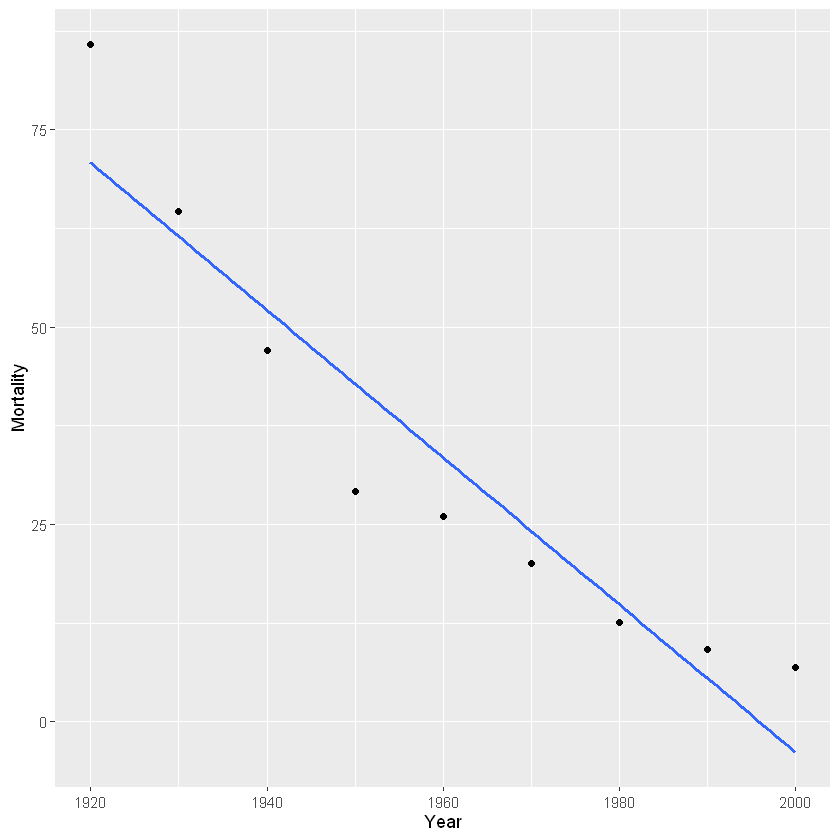

In [20]:
library(ggplot2)

ggplot(IM, mapping=aes(x=Year, y=Mortality)) + geom_point() + geom_smooth(method="lm", formula=y~x, se=FALSE)

*Log transform on independent variable*

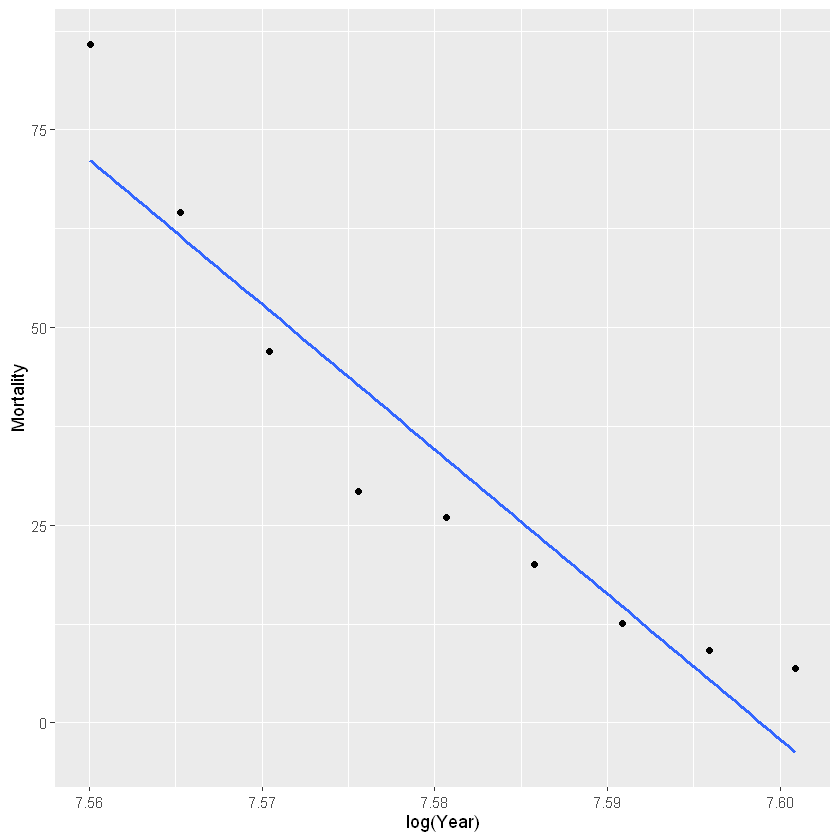

In [40]:
ggplot(IM, mapping=aes(x=log(Year), y=Mortality)) + geom_point() + geom_smooth(method="lm", formula=y~x, se=FALSE)

*Log transform on dependent variable*

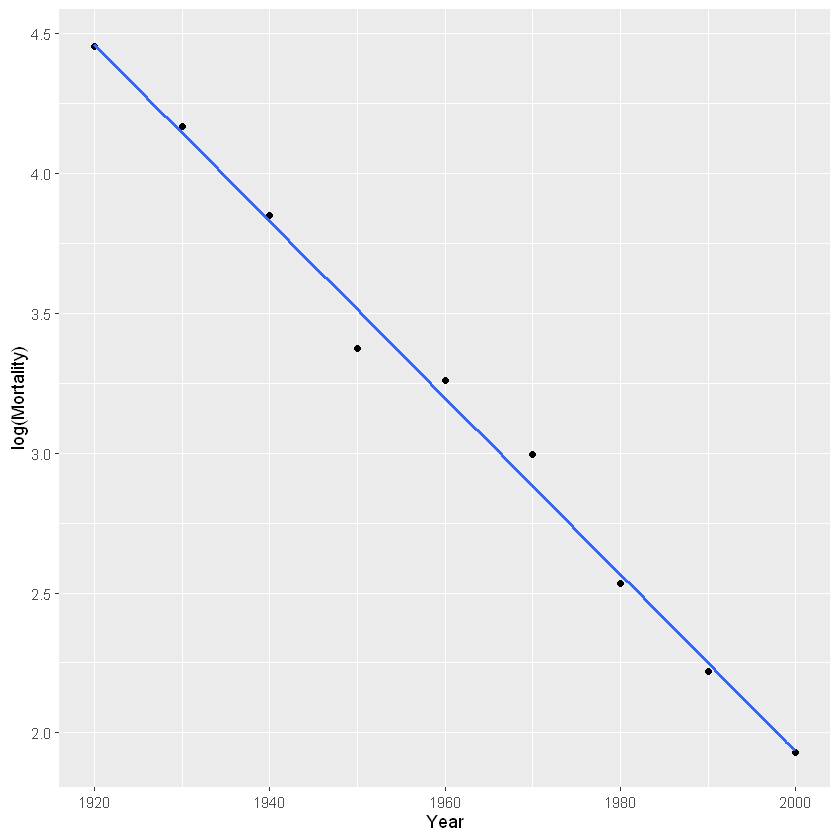

In [41]:
ggplot(IM, mapping=aes(x=Year, y=log(Mortality))) + geom_point() + geom_smooth(method="lm", formula=y~x, se=FALSE)

As we can see a log transform on the response variable (dependent variable) gives much more linear data. The fitted least squares line is shown below:

In [28]:
model = lm(I(log(Mortality))~Year)
summary(model)


Call:
lm(formula = I(log(Mortality)) ~ Year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.139593 -0.031867 -0.003877  0.023107  0.113316 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 65.0699354  1.8910455   34.41 4.54e-09 ***
Year        -0.0315673  0.0009647  -32.72 6.44e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07473 on 7 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9926 
F-statistic:  1071 on 1 and 7 DF,  p-value: 6.444e-09


The equation is
$$\log(\text{Mortality}) \approx -0.032\cdot\text{Year} + 65.07$$

## Part (b)

In [37]:
log_m = predict(model, newdata=data.frame(Year=2009))
cat("Log(Mortality) = ")
cat(log_m)
cat("\n")
cat("Mortality Rate = ")
cat(exp(log_m))
cat("\n")

Log(Mortality) = 1.651293
Mortality Rate = 5.213716


The model predicts that the infant mortality rate in 2009 is around 5.21%

# Question 2

In [43]:
SAT = read.csv("SATGPA.csv")
fix(SAT)
attach(SAT)

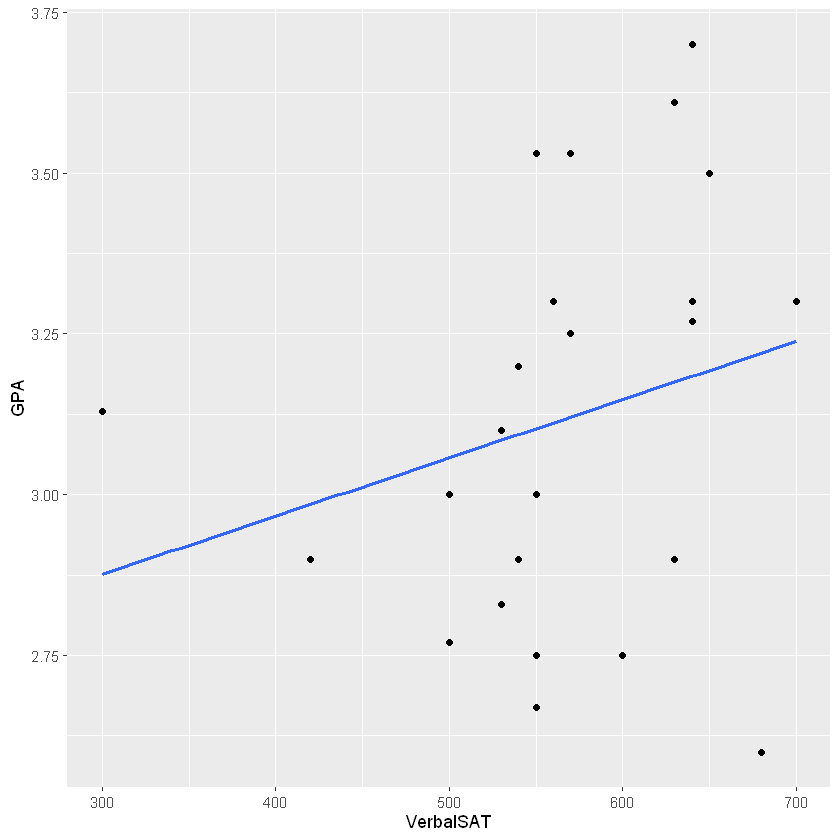

In [45]:
ggplot(SAT, aes(x=VerbalSAT, y=GPA)) + geom_point() + geom_smooth(method="lm", formula=y~x, se=FALSE)

In [46]:
model = lm(GPA~VerbalSAT)
summary(model)


Call:
lm(formula = GPA ~ VerbalSAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62002 -0.25932  0.03885  0.20502  0.51621 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.6042036  0.4377919   5.948  5.5e-06 ***
VerbalSAT   0.0009056  0.0007659   1.182     0.25    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3154 on 22 degrees of freedom
Multiple R-squared:  0.05976,	Adjusted R-squared:  0.01702 
F-statistic: 1.398 on 1 and 22 DF,  p-value: 0.2496


In [47]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
VerbalSAT,1,0.1390902,0.13909021,1.398229,0.2496431
Residuals,22,2.1884723,0.09947601,NA,NA


Our first clue that the relationship is not linear is simply the graph of the points - the line of best fit doesn't capture the relationship between the data. After running a t-test on the slope of the regression line (null hypothesis $H_0: \beta_1 = 0$ - i.e. the slope is 0 and no relationship), we get a t-value of 1.182. This corresponds to a p-value of 0.25 which is not significant at all. Therefore we fail to reject the null hypothesis and conclude that there is not significant evidence to reject the claim that there is no relationship between the Verbal SAT score and the GPA.

The ANOVA test yields a similar result with the F statistic.

# Question 3

## Part (a)

The value of the slope in this regression is 1.9195. This means for every 1 minute increase in the time of the hike, we predict that the elevation gain increases by 1.9195 feet.

## Part (b)

To calculate a 90% confidence interval, we take the critical value for 95% (two-tailed) and multiply by the SE Coefficient to get the margine of error. Our Confidence Interval is then $\hat{\beta_1} \pm t_{0.95}(SE)$.

In [55]:
qt(0.95, df=70)

[1] 1.666914

Confidence Interval:

$1.9195 \pm 1.667\cdot 0.6253 = (0.877,2.962)$

## Part (c)

The $R^2$ value of 11.9% means that 11.9% of the variance in Elevation can be explained by the predictor variable Time.

# Question 4

## Model A

Linearity: Can't Judge - All we can see is the difference between the fitted line and the data points, so we can't tell if the data itself is linear.

Equal Variance: Reasonable - The magnitudes of the residuals stay relatively constant for each predicted value.

Normality: Problematic - The residuals are definitely not normally distributed around the 0 residual line. In som parts the residulas are all positive and in other they are all negative. If it were normal, we'd expect an equal mix of both at every point.

Independence: Problematic - The error term seem to be dependent on the predicted value as in some ranges it is all positive and in others it is all negative. This one is probably the most problematic of all the conditions.

## Model B

Linearity: Can't judge - All we can see are the theoretical quantiles not the actual data itself.

Equal Variance: Can't judge - Again, the main purpose of this graph is to analyze the normality of the errors, so it's difficult to see any other property such as variance.

Normality: Reasonable - Around the middle area, the residuals closely align with the theoretical quantiles if the data was normally distributed. However at the end the it diverges a bit, which I think is find as boundary conditions are always a little off - usually because of lack of data at the extremes.

Independence: Can't judge - Again, the main purpose of this graph is to analyze the normality of the errors, so it's difficult to see any other property such as independence.